In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

Read these(References)

https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a

https://tomaugspurger.github.io/modern-7-timeseries

https://www.ethanrosenthal.com/2018/01/28/time-series-for-scikit-learn-people-part1/

### Data Preparation

In [2]:
train = pd.read_csv("../../../Data & Script/walmart-input/train.csv")
test = pd.read_csv("../../../Data & Script/walmart-input/test.csv")
features =pd.read_csv("../../../Data & Script/walmart-input/features.csv")
storesdata =pd.read_csv("../../../Data & Script/walmart-input/stores.csv")

train = pd.merge(train, features, on=['Store','Date','IsHoliday'], how='inner')
train = pd.merge(train, storesdata, on=['Store'], how='inner')
train.set_index(train.Date, inplace=True)
train.index = pd.to_datetime(train.index)
train.drop("Date", axis=1, inplace=True)

test = pd.merge(test, features, on=['Store','Date','IsHoliday'], how='inner')
test = pd.merge(test, storesdata, on=['Store'], how='inner')
test.set_index(test.Date, inplace=True)
test.drop("Date", axis=1, inplace=True)
test.index = pd.to_datetime(test.index)

In [3]:
# store the index
train_index = train.index
print(train.shape)
print(train.columns)
train.head()

(421570, 15)
Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2010-02-05,1,2,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2010-02-05,1,3,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2010-02-05,1,4,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2010-02-05,1,5,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [4]:
print(test.shape)
print(test.columns)
test.head()

(115064, 14)
Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size'],
      dtype='object')


,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,
2012-11-02,1,1,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2012-11-02,1,2,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2012-11-02,1,3,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2012-11-02,1,4,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2012-11-02,1,5,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


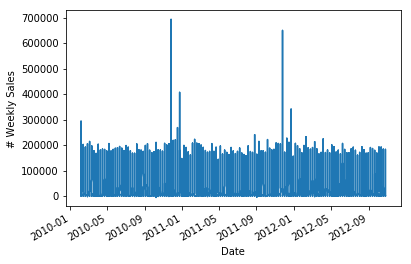

In [5]:
ax = train.Weekly_Sales.plot();
ax.set_ylabel('# Weekly Sales');

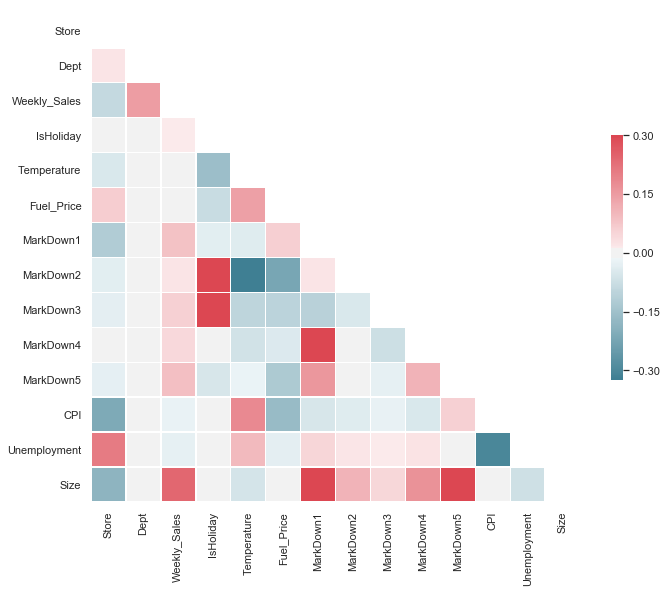

In [6]:
# Code from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Check nulls

In [7]:
train.isnull().sum()

Store                0
Dept                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

Create binary attributes for markdowns

In [8]:
train['markdown1_available'] = train.MarkDown1.notnull()
train['markdown2_available'] = train.MarkDown2.notnull()
train['markdown3_available'] = train.MarkDown3.notnull()
train['markdown4_available'] = train.MarkDown4.notnull()
train['markdown5_available'] = train.MarkDown5.notnull()

In [9]:
train.isnull().sum()

Store                       0
Dept                        0
Weekly_Sales                0
IsHoliday                   0
Temperature                 0
Fuel_Price                  0
MarkDown1              270889
MarkDown2              310322
MarkDown3              284479
MarkDown4              286603
MarkDown5              270138
CPI                         0
Unemployment                0
Type                        0
Size                        0
markdown1_available         0
markdown2_available         0
markdown3_available         0
markdown4_available         0
markdown5_available         0
dtype: int64

In [10]:
# very helpful function to get a specific group
train.groupby(['Store', 'Dept' ]).get_group((1,1))
# get the aveage weekly sales for store 1 group 1
train.groupby(['Store', 'Dept' ]).get_group((1,1)).Weekly_Sales.mean()

22513.322937062956

In [11]:
grouped_train = train.groupby(['Store', 'Dept' ])
train['Prev_Week_Sales_By_Store_Dept'] = grouped_train.Weekly_Sales.shift(1)
train['Prev_4Week_Sales_By_Store_Dept'] = grouped_train.Weekly_Sales.shift(4)

#train = train.sort_values(by = ['Store','Dept', 'Date'])
#train[20000:200020].head()

Previous week sales is not available for the week of the first year for all stores and departments. Previous four weeks sales is not available for the first four weeks for all stores and departments.

In [12]:
train['past_week_sales_available'] = np.where(train.Prev_Week_Sales_By_Store_Dept.isnull(), 0, 1)
train['past_4week_sales_available'] = np.where(train.Prev_4Week_Sales_By_Store_Dept.isnull(), 0, 1)

Fill missing past weekly sales by the mean of the group

In [13]:
grouped_train = train.groupby(['Store', 'Dept' ])
def fix_prev_week(row):
    if(pd.isnull(row.Prev_Week_Sales_By_Store_Dept)):
        mean = grouped_train.get_group((row.Store, row.Dept)).Weekly_Sales.mean()
        return mean
    else:
        return row.Prev_Week_Sales_By_Store_Dept
def fix_prev_four_week(row):
    if(pd.isnull(row.Prev_4Week_Sales_By_Store_Dept)):
        mean = grouped_train.get_group((row.Store, row.Dept)).Weekly_Sales.mean()
        return mean
    else:
        return row.Prev_4Week_Sales_By_Store_Dept
train.loc[:, 'Prev_Week_Sales_By_Store_Dept'] = train.apply(fix_prev_week, axis=1)
train.loc[:, 'Prev_4Week_Sales_By_Store_Dept'] = train.apply(fix_prev_four_week, axis=1)

In [14]:
# test whether the nans are filled properly
grouped_train = train.groupby(['Store', 'Dept' ])
grouped_train.get_group((1,1))['2010'].Prev_Week_Sales_By_Store_Dept[0]

22513.322937062956

In [15]:
grouped_train.get_group((4,8))['2010'].Prev_Week_Sales_By_Store_Dept[0]

62949.723776223764

In [16]:
grouped_train.get_group((1,1))['2010'].Prev_4Week_Sales_By_Store_Dept[0:4]

Date
2010-02-05    22513.322937
2010-02-12    22513.322937
2010-02-19    22513.322937
2010-02-26    22513.322937
Name: Prev_4Week_Sales_By_Store_Dept, dtype: float64

In [17]:
grouped_train.get_group((4,8))['2010'].Prev_4Week_Sales_By_Store_Dept[0:4]

Date
2010-02-05    62949.723776
2010-02-12    62949.723776
2010-02-19    62949.723776
2010-02-26    62949.723776
Name: Prev_4Week_Sales_By_Store_Dept, dtype: float64

Replace null markdowns with 0

In [18]:
train.fillna(0, inplace=True)

In [19]:
train.isnull().sum()

Store                             0
Dept                              0
Weekly_Sales                      0
IsHoliday                         0
Temperature                       0
Fuel_Price                        0
MarkDown1                         0
MarkDown2                         0
MarkDown3                         0
MarkDown4                         0
MarkDown5                         0
CPI                               0
Unemployment                      0
Type                              0
Size                              0
markdown1_available               0
markdown2_available               0
markdown3_available               0
markdown4_available               0
markdown5_available               0
Prev_Week_Sales_By_Store_Dept     0
Prev_4Week_Sales_By_Store_Dept    0
past_week_sales_available         0
past_4week_sales_available        0
dtype: int64

Perfect!!

#### Median Sales

In [20]:
# convert multi-index to single index
median = pd.DataFrame(grouped_train.Weekly_Sales.median()).reset_index()
median.columns = ['Store', 'Dept', 'Median Sales']
median.head()

,Store,Dept,Median Sales
0,1,1,18535.48
1,1,2,45561.85
2,1,3,10366.85
3,1,4,36579.96
4,1,5,21183.42


In [21]:
# Get dataframe with averages per store and department
# outer join works without creating nulls because all stores/depts in median df exisit in traindf
train = pd.merge(train, median, on = ['Store', 'Dept'], how='outer')
train.set_index(train_index, inplace=True)
train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,markdown1_available,markdown2_available,markdown3_available,markdown4_available,markdown5_available,Prev_Week_Sales_By_Store_Dept,Prev_4Week_Sales_By_Store_Dept,past_week_sales_available,past_4week_sales_available,Median Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,...,False,False,False,False,False,22513.322937,22513.322937,0,0,18535.48
2010-02-05,1,1,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,...,False,False,False,False,False,24924.500000,22513.322937,1,0,18535.48
2010-02-05,1,1,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,...,False,False,False,False,False,46039.490000,22513.322937,1,0,18535.48
2010-02-05,1,1,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,...,False,False,False,False,False,41595.550000,22513.322937,1,0,18535.48
2010-02-05,1,1,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,...,False,False,False,False,False,19403.540000,24924.500000,1,1,18535.48


#### Dummies: Store, Type, Dept, IsHoliday

In [22]:
# features like store number and department use numbers
# so let us prefix all categorical variables to make them separate
train['Type'] = 'Type_' + train['Type'].map(str)
train['Store'] = 'Store_' + train['Store'].map(str)
train['Dept'] = 'Dept_' + train['Dept'].map(str)
train['IsHoliday'] = 'IsHoliday_' + train['IsHoliday'].map(str)

# Create dummies
type_dummies = pd.get_dummies(train['Type'])
store_dummies = pd.get_dummies(train['Store'])
dept_dummies = pd.get_dummies(train['Dept'])
holiday_dummies = pd.get_dummies(train['IsHoliday'])

#### Dummies: Month, BlackFriday, PreChristmas

In [23]:
train['Month'] = train.index.month
train['Month'] = 'Month_' + train['Month'].map(str)
Month_dummies = pd.get_dummies(train['Month'] )


train['Black_Friday'] = np.where((train.index.month == 11) & (train.index.day.isin([25,26])), "yes", "no")
train['Pre_christmas'] = np.where((train.index.month == 12) & (train.index.day.isin([23,24])), "yes", "no")
train['Black_Friday'] = 'Black_Friday_' + train['Black_Friday'].map(str)
train['Pre_christmas'] = 'Pre_christmas_' + train['Pre_christmas'].map(str)
Black_Friday_dummies = pd.get_dummies(train['Black_Friday'] )
Pre_christmas_dummies = pd.get_dummies(train['Pre_christmas'] )
train = pd.concat([train, holiday_dummies,Pre_christmas_dummies,Black_Friday_dummies], axis=1)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Median Sales,Month,Black_Friday,Pre_christmas,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,Store_1,Dept_1,24924.50,IsHoliday_False,42.31,2.572,0.0,0.0,0.0,0.0,...,18535.48,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
2010-02-05,Store_1,Dept_1,46039.49,IsHoliday_True,38.51,2.548,0.0,0.0,0.0,0.0,...,18535.48,Month_2,Black_Friday_no,Pre_christmas_no,0,1,1,0,1,0
2010-02-05,Store_1,Dept_1,41595.55,IsHoliday_False,39.93,2.514,0.0,0.0,0.0,0.0,...,18535.48,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
2010-02-05,Store_1,Dept_1,19403.54,IsHoliday_False,46.63,2.561,0.0,0.0,0.0,0.0,...,18535.48,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
2010-02-05,Store_1,Dept_1,21827.90,IsHoliday_False,46.50,2.625,0.0,0.0,0.0,0.0,...,18535.48,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0


#### Sales Difference

In [27]:
train['Difference'] = train['Median Sales'] - train['Weekly_Sales']
train['Sales Dif'] = train['Median Sales'] - train['Prev_Week_Sales_By_Store_Dept']

In [26]:
train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Month,Black_Friday,Pre_christmas,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Difference
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,Store_1,Dept_1,24924.50,IsHoliday_False,42.31,2.572,0.0,0.0,0.0,0.0,...,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,-6389.02
2010-02-05,Store_1,Dept_1,46039.49,IsHoliday_True,38.51,2.548,0.0,0.0,0.0,0.0,...,Month_2,Black_Friday_no,Pre_christmas_no,0,1,1,0,1,0,-27504.01
2010-02-05,Store_1,Dept_1,41595.55,IsHoliday_False,39.93,2.514,0.0,0.0,0.0,0.0,...,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,-23060.07
2010-02-05,Store_1,Dept_1,19403.54,IsHoliday_False,46.63,2.561,0.0,0.0,0.0,0.0,...,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,-868.06
2010-02-05,Store_1,Dept_1,21827.90,IsHoliday_False,46.50,2.625,0.0,0.0,0.0,0.0,...,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,-3292.42


### Choose Model

In [28]:
selector = [
    #'Month',
    'CPI',
    'Fuel_Price',
    'MarkDown1',
    'MarkDown2',
    'MarkDown3',
    'MarkDown4',
    'MarkDown5',
    'Size',
    'Temperature',
    'Unemployment',
    
    
    
    'markdown1_available',
    'markdown2_available',
    'markdown3_available',
    'markdown4_available',
    'markdown5_available',

    'IsHoliday_False',
    'IsHoliday_True',
    'Pre_christmas_no',
    'Pre_christmas_yes',
    'Black_Friday_no',
    'Black_Friday_yes',    
    
    'Prev_Week_Sales_By_Store_Dept',
    'past_week_sales_available',
    'Sales Dif',
    ]

In [30]:
X_train = train[selector]
y_train = train.Difference

##### Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=20, criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=1, random_state=None, 
                      verbose=2, warm_start=False)

#Train on data
regr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.8min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

In [37]:
regr.score(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    5.7s finished


0.9150826391732831

##### Cross Validated Result

In [38]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, X_train, y_train, cv=10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.0s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished


array([0.45679504, 0.45995266, 0.46735374, 0.42841865, 0.48768   ,
       0.47440925, 0.29525272, 0.32716374, 0.34251938, 0.42563534])